<a href="https://colab.research.google.com/github/Andrew-1993/final_project_sda/blob/master/SDA_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SDA FINAL PROJECT KADRI & ANDREI

**Project name:** Microsoft Stocks Price Prediction

**Project goal:** Predict Microsoft stock price as accurate as possible using different models

**Data:** https://finance.yahoo.com/quote/MSFT/history?p=MSFT 

# Importing all the necessary libraries 

In [204]:
import pandas as pd
import numpy as np
import math
import os
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from itertools import cycle
import plotly.express as px
import statistics

from sklearn.linear_model import LinearRegression
from math import floor,ceil,sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import max_error
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import SimpleRNN

# READING AND PROCESSING DATA

Reading the data and checking the dataframe (what type of data, are there NULL values)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#MAIN DF
df = pd.read_csv('/content/drive/My Drive/MSFT.csv', )

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-05,92.339996,94.269997,92.260002,93.639999,88.375061,23901600
1,2018-03-06,94.339996,94.489998,92.940002,93.320000,88.073044,22175800
2,2018-03-07,93.160004,93.940002,92.430000,93.860001,88.582703,26716100
3,2018-03-08,94.269997,95.099998,93.769997,94.430000,89.120636,25887800
4,2018-03-09,95.290001,96.540001,95.000000,96.540001,91.112022,36937300


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,199.090628,201.193709,196.870929,199.130850,195.081565,3.021245e+07
std,72.719266,73.478753,71.903922,72.727512,73.510435,1.281956e+07
min,87.849998,90.050003,87.080002,87.180000,82.278275,8.989200e+06
25%,129.854996,130.674995,128.925003,129.830001,124.598461,2.219930e+07
50%,209.559998,211.979996,206.979996,209.699997,204.974960,2.707320e+07
75%,257.584992,260.145004,254.444999,257.229995,254.736229,3.427080e+07
max,344.619995,349.670013,342.200012,343.109985,339.075592,1.112421e+08


In [9]:
#Checking Null and N/A values
print("Null values:", df.isnull().values.sum())
print("NA values:", df.isna().values.any())

Null values: 0
NA values: False


In [10]:
#Convert date to correct date format
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2018-03-05,2018-03-05,92.339996,94.269997,92.260002,93.639999,88.375061,23901600
2018-03-06,2018-03-06,94.339996,94.489998,92.940002,93.320000,88.073044,22175800
2018-03-07,2018-03-07,93.160004,93.940002,92.430000,93.860001,88.582703,26716100
2018-03-08,2018-03-08,94.269997,95.099998,93.769997,94.430000,89.120636,25887800
2018-03-09,2018-03-09,95.290001,96.540001,95.000000,96.540001,91.112022,36937300


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-03-05 to 2023-03-03
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 78.7 KB


In [12]:
#Exploratory Data Analysis
print("Start date: ",df.iloc[0][0])
print("End date: ", df.iloc[-1][0])
print("Duration: ", df.iloc[-1][0]-df.iloc[0][0])

Start date:  2018-03-05 00:00:00
End date:  2023-03-03 00:00:00
Duration:  1824 days 00:00:00


In [13]:
# converting days and months from numerics to categories
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df['Weekday name'] = df['Date'].dt.strftime('%A')

In [15]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Weekday name
Date,,,,,,,,,,,
2018-03-05,2018-03-05,92.339996,94.269997,92.260002,93.639999,88.375061,23901600,2018,3,5,Monday
2018-03-06,2018-03-06,94.339996,94.489998,92.940002,93.320000,88.073044,22175800,2018,3,6,Tuesday
2018-03-07,2018-03-07,93.160004,93.940002,92.430000,93.860001,88.582703,26716100,2018,3,7,Wednesday
2018-03-08,2018-03-08,94.269997,95.099998,93.769997,94.430000,89.120636,25887800,2018,3,8,Thursday
2018-03-09,2018-03-09,95.290001,96.540001,95.000000,96.540001,91.112022,36937300,2018,3,9,Friday


# DATA ANALYZE
Starting to plot different plots in order to understand the data, how the data has changed during time, finding seasonalities, finding patterns, checking correlations, price changes, daily returns.

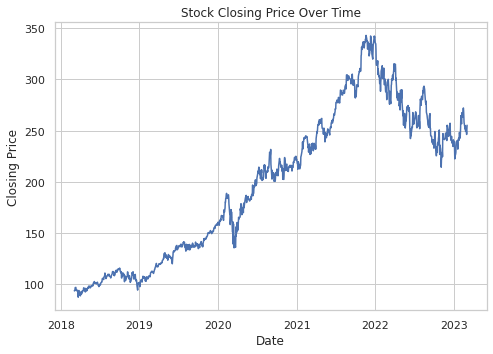

In [59]:
#Checking the overall close price in the past 5years

fig = plt.figure()

axes1 = fig.add_axes([0, 0, 1, 1])

axes1.plot(df['Date'], df['Close'])

axes1.set_xlabel('Date')
axes1.set_ylabel('Closing Price')
axes1.set_title('Stock Closing Price Over Time')

plt.savefig('/content/drive/My Drive/stockclose1.png')

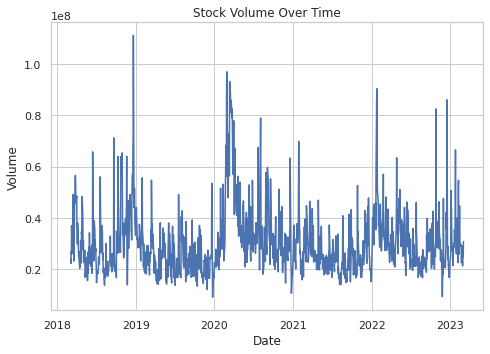

In [220]:
#Checking the overall volume in the past 5years

fig = plt.figure()

axes1 = fig.add_axes([0, 0, 1, 1])

axes1.plot(df['Date'], df['Volume'])

axes1.set_xlabel('Date')
axes1.set_ylabel('Volume')
axes1.set_title('Stock Volume Over Time')

plt.savefig('/content/drive/My Drive/volume.png')

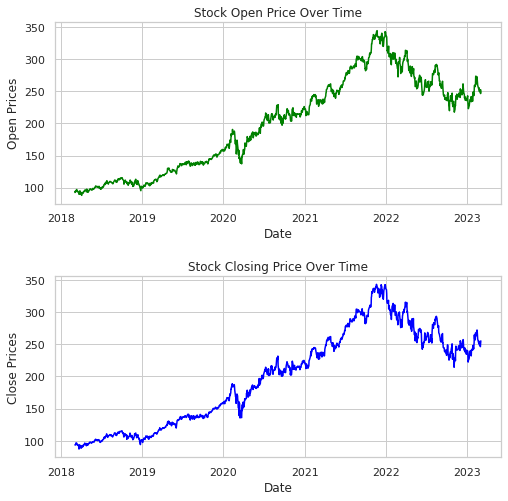

In [60]:
#Comparing open and close prices

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Plot the open prices
axes[0].plot('Date', 'Open', data=df, color='green')
axes[0].set_title('Stock Open Price Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Open Prices')
axes[0].grid(True)

# Plot the close prices
axes[1].plot('Date', 'Close', data=df, color='blue')
axes[1].set_title('Stock Closing Price Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Close Prices')
axes[1].grid(True)

# Adjusting the spacing between subplots to prevent overlap
plt.subplots_adjust(hspace=0.4)

# Save the figure
plt.savefig('/content/drive/My Drive/openclose.png')

# Show the plot
plt.show()

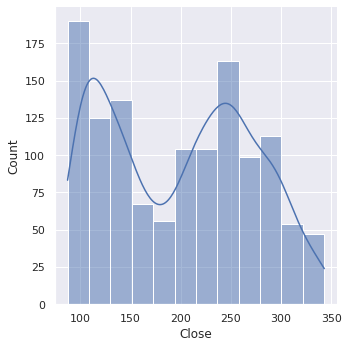

In [68]:
#Checking the count of close price

sns.set(style='darkgrid')
sns.displot(data=df,x='Close',kde=True)

# Saving the figure
plt.savefig('/content/drive/My Drive/closecount.png')

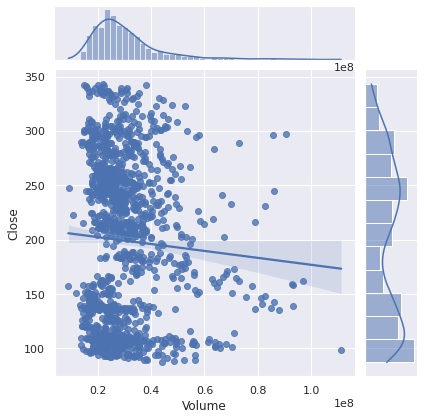

In [69]:
#Checking the close and volume 

sns.jointplot(x='Volume', y='Close', data=df, kind='reg')

# Saving the figure
plt.savefig('/content/drive/My Drive/closevolume.png')

In [63]:
df['Daily returns'] = df['Close'].pct_change() #Pandas dataframe.pct_change() function calculates the percentage change between the current and a prior element.
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Weekday name,Daily returns
Date,,,,,,,,,,,,
2018-03-05,2018-03-05,92.339996,94.269997,92.260002,93.639999,88.375061,23901600,2018,3,5,Monday,NaN
2018-03-06,2018-03-06,94.339996,94.489998,92.940002,93.320000,88.073044,22175800,2018,3,6,Tuesday,-0.003417
2018-03-07,2018-03-07,93.160004,93.940002,92.430000,93.860001,88.582703,26716100,2018,3,7,Wednesday,0.005787
2018-03-08,2018-03-08,94.269997,95.099998,93.769997,94.430000,89.120636,25887800,2018,3,8,Thursday,0.006073
2018-03-09,2018-03-09,95.290001,96.540001,95.000000,96.540001,91.112022,36937300,2018,3,9,Friday,0.022345


In [66]:
#Best Day of Stock
df[df['Daily returns']==df['Daily returns'].max()]['Daily returns']

Date
2020-03-13    0.142169
Name: Daily returns, dtype: float64

In [67]:
#Worst day of Stock
df[df['Daily returns']==df['Daily returns'].min()]['Daily returns']

Date
2020-03-16   -0.14739
Name: Daily returns, dtype: float64

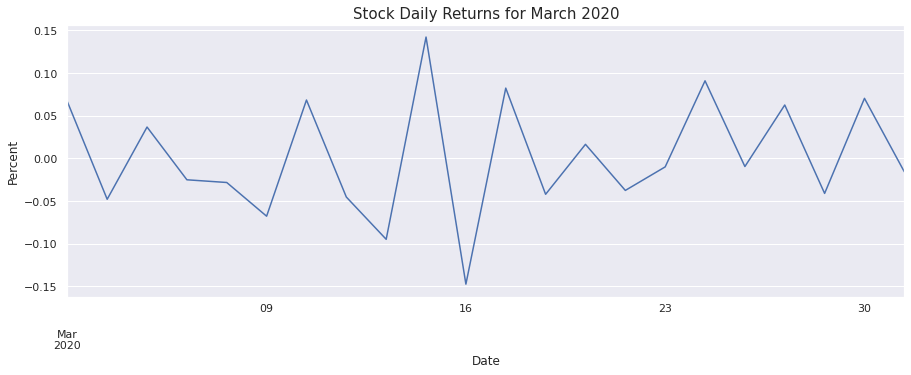

<Figure size 432x288 with 0 Axes>

In [72]:
#Checking what happened with close price 

start_date = '2020-03-01'
end_date = '2020-03-31'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df_march = df.loc[mask]

# plot the filtered data
plt.figure(figsize=(15,5))
df_march['Daily returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Stock Daily Returns for March 2020", fontsize=15)
plt.show()

# Saving the figure
plt.savefig('/content/drive/My Drive/marchclose.png')

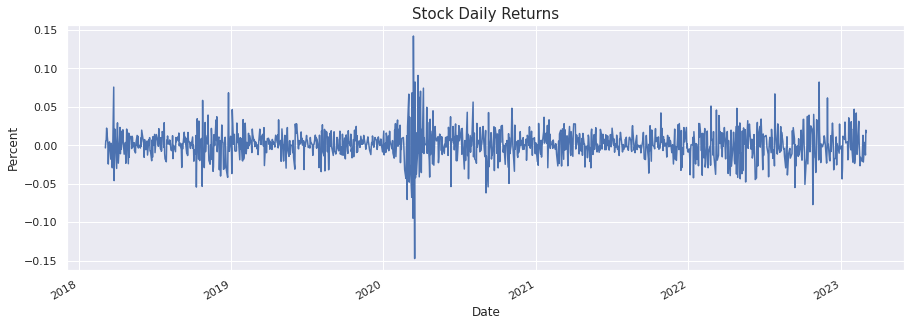

In [73]:
#Checking stock daily returns in 5years

plt.figure(figsize=(15,5))
df['Daily returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Stock Daily Returns",fontsize= 15)

# Saving the figure
plt.savefig('/content/drive/My Drive/dailyreturns.png')

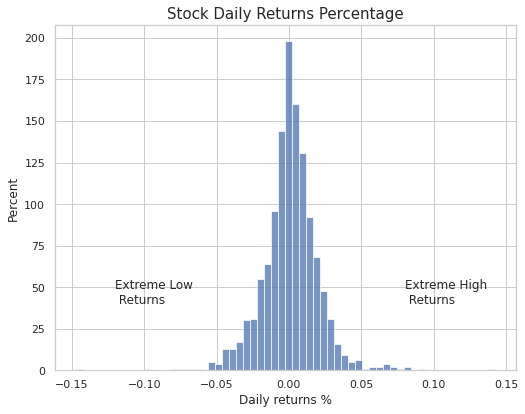

<Figure size 432x288 with 0 Axes>

In [74]:
#Checking stock daily returns percentage

sns.set_style('whitegrid')
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
sns.histplot(data= df['Daily returns'], bins=60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Stock Daily Returns Percentage",fontsize= 15 )
ax1.text(-0.12,40,"Extreme Low\n Returns",fontsize= 12)
ax1.text(0.08,40,"Extreme High\n Returns", fontsize= 12)
plt.show()

# Saving the figure
plt.savefig('/content/drive/My Drive/dailyreturnspercentage.png')

In [75]:
#Month comparision between open and close price
month_comp = df.groupby(df['Date'].dt.strftime('%B'))[['Open','Close']].mean()
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
month_comp = month_comp.reindex(order, axis=0)
month_comp

,Open,Close
Date,,
January,205.839406,205.631781
February,216.860632,217.028211
March,184.292343,184.400000
April,185.119519,184.898269
May,181.937619,181.993142
June,189.659056,189.990095
July,197.387924,197.615661
August,206.384054,206.570540
September,203.653923,203.098529


In [76]:
month_comp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, January to December
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    12 non-null     float64
 1   Close   12 non-null     float64
dtypes: float64(2)
memory usage: 288.0+ bytes


In [77]:
#Checking the open/close mean price monthly comparison

fig = go.Figure()

fig.add_trace(go.Bar(
    x=month_comp.index,
    y=month_comp['Open'],
    name='Stock Open Price',
    marker_color='lightblue'
))
fig.add_trace(go.Bar(
    x=month_comp.index,
    y=month_comp['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthly comparision between Stock open and close price')
fig.show()

# Saving the figure
plt.savefig('/content/drive/My Drive/monthlycomp.png')

<Figure size 432x288 with 0 Axes>

In [85]:
month_comp_high = df.groupby(df["Date"].dt.strftime("%B"))['High'].max()
month_comp_high = month_comp_high.reindex(axis=0)
month_comp_low = df.groupby(df["Date"].dt.strftime('%B'))['Low'].min()
month_comp_low = month_comp_low.reindex(axis=0)

In [86]:
#Checking the low/high price month comparison

fig = go.Figure()

fig.add_trace(go.Bar(
    x=month_comp_high.index,
    y=month_comp_high,
    name="Stock high Price",
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=month_comp_low.index,
    y=month_comp_low,
    name="Stock low Price",
    marker_color='rgb(255, 128, 0)'
))
fig.update_layout(barmode='group',
                  title='Monthly High and Low stock price')
fig.show()

# Saving the figure
plt.savefig('/content/drive/My Drive/monthlycomp1.png')

<Figure size 432x288 with 0 Axes>

In [78]:
weekday_comp = df.groupby('Weekday name')[['Open', 'Close']].mean()

In [80]:
#Checking the open/close mean price weekday comparison

# defining the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# creating a bar chart with weekday names on x-axis and mean open and close prices on y-axis
fig = go.Figure()
fig.add_trace(go.Bar(x=weekday_comp.index, y=weekday_comp['Open'], name='Open', marker_color='lightpink'))
fig.add_trace(go.Bar(x=weekday_comp.index, y=weekday_comp['Close'], name='Close', marker_color='darkblue'))

fig.update_layout(title='Mean Open and Close Prices by Weekday',
                   yaxis_title='Mean Price',
                   xaxis={'categoryorder': 'array', 'categoryarray': weekday_order})

fig.show()

# Saving the figure
plt.savefig('/content/drive/My Drive/weekdaycomp.png')

<Figure size 432x288 with 0 Axes>

In [81]:
weekday_comp_high = df.groupby('Weekday name')['High'].max()
weekday_comp_high = weekday_comp_high.reindex(axis=0)
weekday_comp_low = df.groupby('Weekday name')['Low'].min()
weekday_comp_low = weekday_comp_low.reindex(axis=0)

In [83]:
#Checking the low/high price weekday comparison

fig = go.Figure()

fig.add_trace(go.Bar(
    x=weekday_comp_high.index,
    y=weekday_comp_high,
    name="Stock high Price",
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=weekday_comp_low.index,
    y=weekday_comp_low,
    name="Stock low Price",
    marker_color='rgb(255, 128, 0)'
))
fig.update_layout(barmode='group',
                  title='Weekday High and Low stock price')
fig.show()

# Saving the figure
plt.savefig('/content/drive/My Drive/weekdaycomp1.png')


<Figure size 432x288 with 0 Axes>

In [87]:
#Trend comparision between stock open price, close price, high price, low price

names = cycle(['Open Price','Close Price','High Price','Low Price'])

fig = px.line(df, x=df.Date, y=[df['Open'], df['Close'], 
                                          df['High'], df['Low']],
             labels={'Date': 'Date','value':'Stock value'})

fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Saving the figure
plt.savefig('/content/drive/My Drive/stockanalysis.png')

<Figure size 432x288 with 0 Axes>

# TRADITIONAL MACHINE LEARNING MODELS
Will try different models in order to figure out which one would be best for our future prediciton

# Linear Regression

In [88]:
def linear_regression_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-----------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    #implement linear regression
    model = LinearRegression()
    model.fit(np.array(x_train).reshape(-1,1),y_train)
    preds = model.predict(np.array(x_valid).reshape(-1,1))
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['Close'])-preds),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    print(valid_set)
    valid_set['Predictions'] = preds
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Linear Regression',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

-----------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY LINEAR REGRESSION-----------
-----------------------------------------------------------------
Shape of Training Set (945, 1)
Shape of Validation Set (314, 1)
RMSE value on validation set: 65.49100360645733
-----------------------------------------------------------
-----------------------------------------------------------
                 Close
Date                  
2021-12-02  329.489990
2021-12-03  323.010010
2021-12-06  326.190002
2021-12-07  334.920013
2021-12-08  334.970001
...                ...
2023-02-27  250.160004
2023-02-28  249.419998
2023-03-01  246.270004
2023-03-02  251.110001
2023-03-03  255.289993

[314 rows x 1 columns]


<ipython-input-88-cc4fd96dda24>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



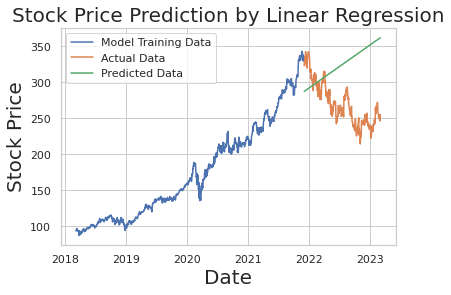

In [89]:
linear_regression_prediction(df)

# K-Nearest Neighbors

In [96]:
def knn_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_set = df_new.iloc[:int(shape*0.75)]
    valid_set = df_new.iloc[int(shape*0.75):]
    print('-----------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS-----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    train=train_set.reset_index()
    valid=valid_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(np.array(x_train).reshape(-1, 1))
    x_train = pd.DataFrame(x_train_scaled)
    x_valid_scaled = scaler.fit_transform(np.array(x_valid).reshape(-1, 1))
    x_valid = pd.DataFrame(x_valid_scaled)
    params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
    knn = neighbors.KNeighborsRegressor()
    model = GridSearchCV(knn, params, cv=5)
    model.fit(x_train,y_train)
    preds = model.predict(x_valid)
    rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = preds
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by K-Nearest Neighbors',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

-----------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS-----------
-----------------------------------------------------------------
Shape of Training Set (944, 1)
Shape of Validation Set (315, 1)
RMSE value on validation set: 132.06881777498273
-----------------------------------------------------------
-----------------------------------------------------------


<ipython-input-96-e7f8ea0dee10>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



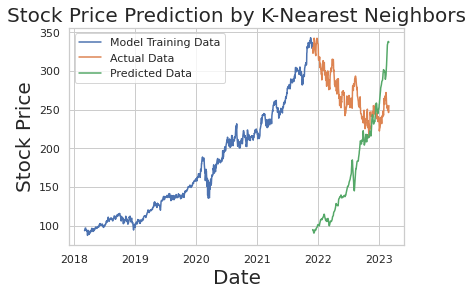

In [97]:
knn_prediction(df)

# Decision Tree Regression

In [107]:
df2 = df['Close']
df2 = pd.DataFrame(df2)    

In [108]:
future_days = 30
df2['Prediction'] = df2['Close'].shift(-future_days)

In [109]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 93.639999]
 [ 93.32    ]
 [ 93.860001]
 ...
 [240.350006]
 [235.809998]
 [231.929993]]


<ipython-input-109-5c69b61eae2a>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [110]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[ 96.07      96.440002  96.110001 ... 246.270004 251.110001 255.289993]


In [111]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [112]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [113]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-113-4ab4510f9901>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



array([[245.119995],
       [244.369995],
       [247.399994],
       [245.419998],
       [252.509995],
       [256.920013],
       [257.220001],
       [249.009995],
       [244.690002],
       [240.449997],
       [241.800003],
       [244.429993],
       [238.190002],
       [238.729996],
       [236.960007],
       [234.529999],
       [241.009995],
       [239.820007],
       [239.580002],
       [229.100006],
       [222.309998],
       [224.929993],
       [227.119995],
       [228.850006],
       [235.770004],
       [238.509995],
       [239.229996],
       [240.350006],
       [235.809998],
       [231.929993]])

In [114]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[240.220001  242.580002  262.2750015 240.610001  252.9450075 248.160004
 289.670013  247.809998  252.75      264.600006  258.350006  242.580002
 267.559998  266.730011  263.619995  263.100006  271.320007  272.170013
 269.320007  255.850006  258.059998  252.669998  251.509995  244.429993
 249.220001  255.139999  249.419998  246.270004  251.110001  255.289993 ]


In [115]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[246.88061423 246.16587315 249.05342617 247.16651352 253.92319637
 258.12589109 258.41177609 250.58773798 246.47083601 242.43016166
 243.71670133 246.22305053 240.27641329 240.79102116 239.10424268
 236.78847395 242.96383309 241.82978868 241.60106677 231.61375518
 225.14295829 227.63978237 229.72682824 231.37550815 237.97018397
 240.58136282 241.26751521 242.33487142 238.00829778 234.31069914]


In [116]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

<ipython-input-116-3343a07a945e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



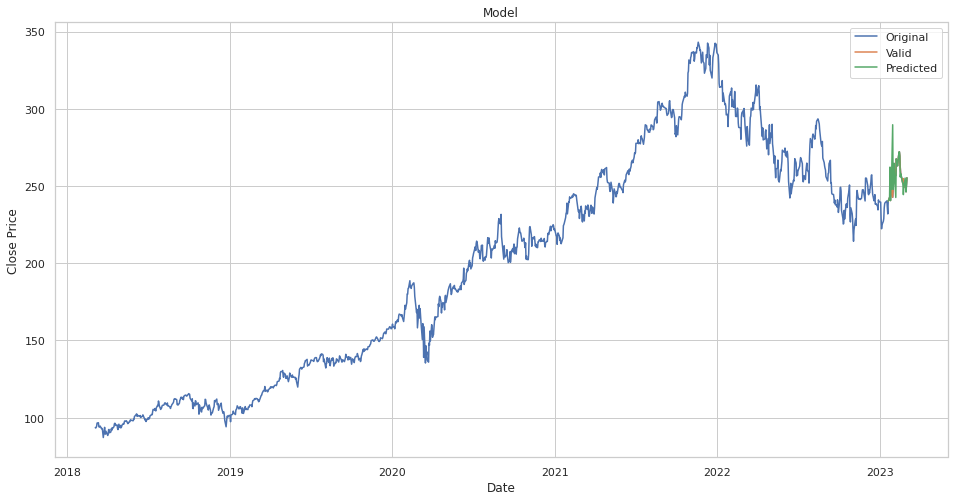

In [117]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

# Random Forest Regressor

In [101]:
X= df[['Date']]
y= df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [103]:
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
model.fit(np.array(X_train).reshape(-1, 1), y_train)
predict = model.predict(np.array(X_test).reshape(-1, 1))
print(predict.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(252,)
(1007, 1)
(1007,)
(252, 1)


In [106]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 2.427
Mean Squared Error: 11.7059
Root Mean Squared Error: 3.4214
(R^2) Score: 0.9978
Train Score : 99.93% and Test Score : 99.78% using Random Tree Regressor.
Accuracy: 98.79 %.


# DEEP LEARNING MODELS

# LSTM (Long Short-Term Memory)

In [222]:
def lstm_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    dataset = df_new.values
    train=df_new[:ceil(shape*0.75)]
    valid=df_new[ceil(shape*0.75):]
    print('STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)')
    print('Shape of Training Set',train.shape)
    print('Shape of Validation Set',valid.shape)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    x_train, y_train = [], []
    for i in range(40,len(train)):
        x_train.append(scaled_data[i-40:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    model = Sequential()
    model.add(LSTM(units=32, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=32))
    model.add(Dropout(0.20))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='SGD')
    model.fit(x_train, y_train, epochs=1, batch_size=32, verbose=2)
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(40,inputs.shape[0]):
        X_test.append(inputs[i-40:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid['predictions'] = closing_price
    plt.plot(train['Close'])
    plt.plot(valid[['Close','predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)
Shape of Training Set (945, 1)
Shape of Validation Set (314, 1)
29/29 - 3s - loss: 0.0921 - 3s/epoch - 114ms/step
10/10 [==============================] - 1s 7ms/step
RMSE value on validation set: Close    92.402503
dtype: float64
-----------------------------------------------------------
-----------------------------------------------------------


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

<ipython-input-222-269116f773e2>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



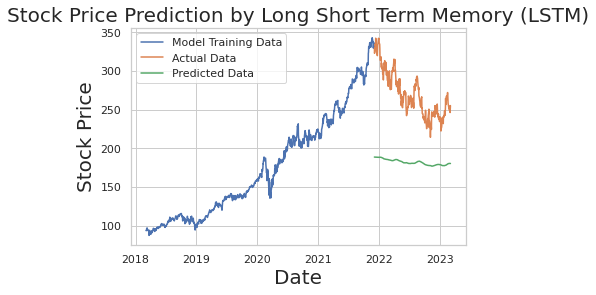

In [223]:
#optimizer Stochastic Gradient Descent and epochs 1
lstm_prediction(df)

In [194]:
def lstm_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    dataset = df_new.values
    train=df_new[:ceil(shape*0.75)]
    valid=df_new[ceil(shape*0.75):]
    print('STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)')
    print('Shape of Training Set',train.shape)
    print('Shape of Validation Set',valid.shape)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    x_train, y_train = [], []
    for i in range(40,len(train)):
        x_train.append(scaled_data[i-40:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    model = Sequential()
    model.add(LSTM(units=32, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=32))
    model.add(Dropout(0.20))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=2)
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(40,inputs.shape[0]):
        X_test.append(inputs[i-40:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
    print('RMSE value on validation set:',rms)
    r2score = r2_score(valid, closing_price)
    max_error = np.max(np.abs(valid-closing_price))
    variance = explained_variance_score(valid, closing_price)
    print("R2 Score:", r2score)
    print("Max Error:", max_error)
    print("Variance:", variance)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid['predictions'] = closing_price
    plt.plot(train['Close'])
    plt.plot(valid[['Close','predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)
Shape of Training Set (945, 1)
Shape of Validation Set (314, 1)
Epoch 1/10
29/29 - 4s - loss: 0.0583 - 4s/epoch - 124ms/step
Epoch 2/10
29/29 - 1s - loss: 0.0058 - 754ms/epoch - 26ms/step
Epoch 3/10
29/29 - 1s - loss: 0.0037 - 733ms/epoch - 25ms/step
Epoch 4/10
29/29 - 1s - loss: 0.0035 - 736ms/epoch - 25ms/step
Epoch 5/10
29/29 - 1s - loss: 0.0030 - 757ms/epoch - 26ms/step
Epoch 6/10
29/29 - 1s - loss: 0.0030 - 765ms/epoch - 26ms/step
Epoch 7/10
29/29 - 1s - loss: 0.0027 - 726ms/epoch - 25ms/step
Epoch 8/10
29/29 - 1s - loss: 0.0026 - 738ms/epoch - 25ms/step
Epoch 9/10
29/29 - 1s - loss: 0.0029 - 766ms/epoch - 26ms/step
Epoch 10/10
29/29 - 1s - loss: 0.0030 - 979ms/epoch - 34ms/step
10/10 [==============================] - 1s 9ms/step
RMSE value on validation set: Close    22.373025
dtype: float64
R2 Score: 0.43266412981149827
Max Error: Close    44.49826
dtype: float64
Variance: 0.8229209000600328
-------------------------------

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'

<ipython-input-194-3995617d0898>:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



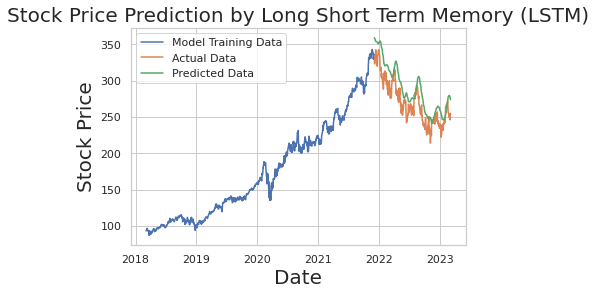

In [195]:
#Optimizer adam, epochs 10
lstm_prediction(df)

# LSTM With bigger dataframe

In [142]:
#BIGGER DF - weekly info from 1986 til 2023 March
df2 = pd.read_csv('/content/drive/My Drive/MICRO.csv', )

In [143]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1932 non-null   object 
 1   Open       1932 non-null   float64
 2   High       1932 non-null   float64
 3   Low        1932 non-null   float64
 4   Close      1932 non-null   float64
 5   Adj Close  1932 non-null   float64
 6   Volume     1932 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 105.8+ KB


In [144]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2.index = df2['Date']

In [145]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1986-03-10,1986-03-10,0.088542,0.102431,0.088542,0.100694,0.062823,1339948800
1986-03-17,1986-03-17,0.100694,0.103299,0.091146,0.092882,0.057949,367257600
1986-03-24,1986-03-24,0.092882,0.096354,0.089410,0.096354,0.060115,136972800
1986-03-31,1986-03-31,0.096354,0.098958,0.093750,0.096354,0.060115,100598400
1986-04-07,1986-04-07,0.096354,0.101563,0.092882,0.099826,0.062281,70070400


In [196]:
def lstm_prediction(df2):
    shape=df2.shape[0]
    df_new2=df2[['Close']]
    df_new2.head()
    dataset = df_new2.values
    train=df_new2[:ceil(shape*0.75)]
    valid=df_new2[ceil(shape*0.75):]
    print('STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)')
    print('Shape of Training Set',train.shape)
    print('Shape of Validation Set',valid.shape)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    x_train, y_train = [], []
    for i in range(40,len(train)):
        x_train.append(scaled_data[i-40:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    model = Sequential()
    model.add(LSTM(units=32, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=32))
    model.add(Dropout(0.20))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=2)
    inputs = df_new2[len(df_new2) - len(valid) - 40:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(40,inputs.shape[0]):
        X_test.append(inputs[i-40:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
    r2score = r2_score(valid, closing_price)
    max_error = np.max(np.abs(valid-closing_price))
    variance = explained_variance_score(valid, closing_price)
    print('RMSE value on validation set:',rms)
    print("R2 Score:", r2score)
    print("Max Error:", max_error)
    print("Variance:", variance)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid['predictions'] = closing_price
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid['predictions'] = closing_price
    fig, axes = plt.subplots(figsize=(12, 8))
    plt.plot(train['Close'])
    plt.plot(valid[['Close','predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Long Short Term Memory (LSTM)',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)
Shape of Training Set (1449, 1)
Shape of Validation Set (483, 1)
Epoch 1/10
45/45 - 4s - loss: 4.5989e-04 - 4s/epoch - 86ms/step
Epoch 2/10
45/45 - 1s - loss: 1.0397e-04 - 1s/epoch - 24ms/step
Epoch 3/10
45/45 - 1s - loss: 1.1562e-04 - 1s/epoch - 28ms/step
Epoch 4/10
45/45 - 1s - loss: 9.5434e-05 - 1s/epoch - 31ms/step
Epoch 5/10
45/45 - 1s - loss: 8.3798e-05 - 1s/epoch - 28ms/step
Epoch 6/10
45/45 - 1s - loss: 1.1269e-04 - 1s/epoch - 25ms/step
Epoch 7/10
45/45 - 1s - loss: 7.4057e-05 - 1s/epoch - 25ms/step
Epoch 8/10
45/45 - 1s - loss: 7.0627e-05 - 1s/epoch - 24ms/step
Epoch 9/10
45/45 - 1s - loss: 7.4144e-05 - 1s/epoch - 25ms/step
Epoch 10/10
45/45 - 1s - loss: 5.8774e-05 - 1s/epoch - 24ms/step
16/16 [==============================] - 1s 8ms/step
RMSE value on validation set: Close    30.606458
dtype: float64
R2 Score: 0.884464838181683
Max Error: Close    101.283554
dtype: float64
Variance: 0.9326084553548792
------------------

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'

<ipython-input-196-b76eb00e9117>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-196-b76eb00e9117>:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

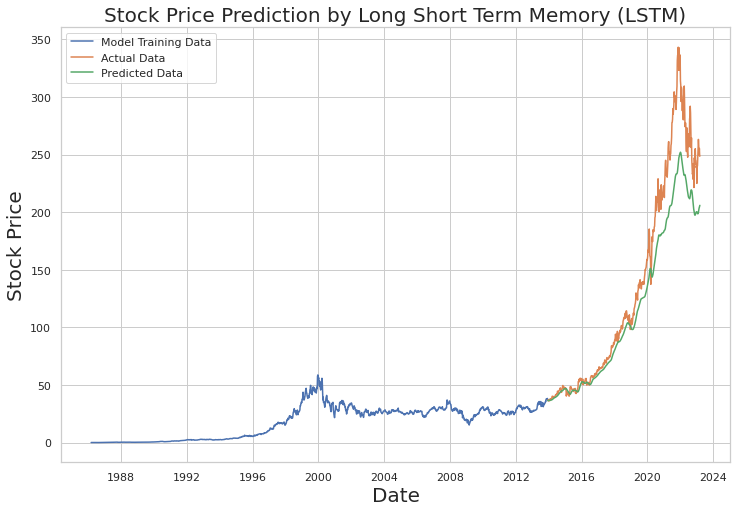

In [197]:
lstm_prediction(df2)

# RNN (Recurrent neural networks)

In [216]:
def rnn_prediction(df):
    shape = df.shape[0]
    df_new = df[['Close']]
    df_new.head()
    train_set = df_new.iloc[:ceil(shape*0.75)]
    valid_set = df_new.iloc[ceil(shape*0.75):]
    print('-----------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY RECURRENT NEURAL NETWORK (RNN)-----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)
    # Prepare data for RNN
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df_new)
    train_size = ceil(shape*0.75)
    x_train, y_train = [], []
    for i in range(60, train_size):
        x_train.append(scaled_data[i-60:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    # Define RNN model
    model = Sequential()
    model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, epochs=1, batch_size=32)
    # Prepare data for validation
    inputs = df_new[len(df_new) - len(valid_set) - 60:].values
    inputs = scaler.transform(inputs)
    X_test = []
    for i in range(60, inputs.shape[0]):
        X_test.append(inputs[i-60:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    # Make predictions
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    rms = np.sqrt(np.mean(np.power((valid_set-closing_price),2)))
    r2 = r2_score(valid_set, closing_price)
    max_err = max_error(valid_set, closing_price)
    print('RMSE value on validation set:',rms)
    print('R2 score on validation set:', r2)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = closing_price
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = closing_price
    fig, axes = plt.subplots(figsize=(14, 10))
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Recurrent Neural Network (RNN)',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

-----------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY RECURRENT NEURAL NETWORK (RNN)-----------
-----------------------------------------------------------------
Shape of Training Set (945, 1)
Shape of Validation Set (314, 1)
28/28 [==============================] - 3s 34ms/step - loss: 0.2102


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



10/10 [==============================] - 0s 9ms/step
RMSE value on validation set: Close    20.734659
dtype: float64
R2 score on validation set: 0.5127132403967287
-----------------------------------------------------------
-----------------------------------------------------------
RMSE value on validation set: Close    20.734659
dtype: float64
-----------------------------------------------------------
-----------------------------------------------------------


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

<ipython-input-216-454e65e6f4a9>:51: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-216-454e65e6f4a9>:55: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



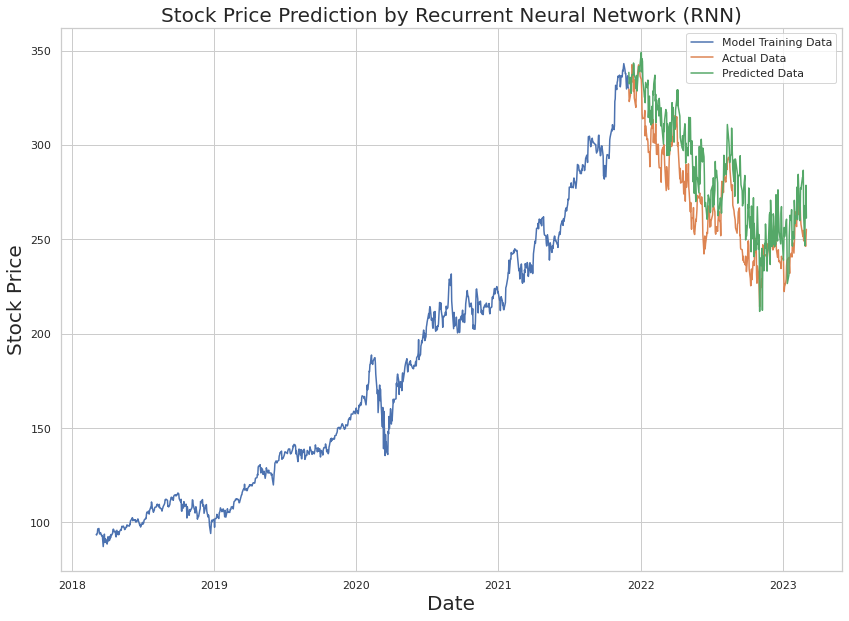

In [217]:
rnn_prediction(df)

In [218]:
def rnn_prediction(df2):
    shape = df2.shape[0]
    df_new2 = df2[['Close']]
    df_new2.head()
    train_set = df_new2.iloc[:ceil(shape*0.75)]
    valid_set = df_new2.iloc[ceil(shape*0.75):]
    print('-----------------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY RECURRENT NEURAL NETWORK (RNN)-----------')
    print('-----------------------------------------------------------------')
    print('Shape of Training Set', train_set.shape)
    print('Shape of Validation Set', valid_set.shape)
    # Prepare data for RNN
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df_new2)
    train_size = ceil(shape*0.75)
    x_train, y_train = [], []
    for i in range(60, train_size):
        x_train.append(scaled_data[i-60:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    # Define RNN model
    model = Sequential()
    model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, epochs=20, batch_size=32)
    # Prepare data for validation
    inputs = df_new2[len(df_new2) - len(valid_set) - 60:].values
    inputs = scaler.transform(inputs)
    X_test = []
    for i in range(60, inputs.shape[0]):
        X_test.append(inputs[i-60:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    # Make predictions
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    rms = np.sqrt(np.mean(np.power((valid_set-closing_price),2)))
    r2 = r2_score(valid_set, closing_price)
    max_err = max_error(valid_set, closing_price)
    print('RMSE value on validation set:',rms)
    print('R2 score on validation set:', r2)
    print('RMSE value on validation set:', rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = closing_price
    fig, axes = plt.subplots(figsize=(14, 10))
    plt.plot(train_set['Close'])
    plt.plot(valid_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by Recurrent Neural Network (RNN)',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

-----------------------------------------------------------------
-----------STOCK PRICE PREDICTION BY RECURRENT NEURAL NETWORK (RNN)-----------
-----------------------------------------------------------------
Shape of Training Set (1449, 1)
Shape of Validation Set (483, 1)
Epoch 1/20
44/44 [==============================] - 5s 34ms/step - loss: 0.1163
Epoch 2/20
44/44 [==============================] - 1s 33ms/step - loss: 0.0217
Epoch 3/20
44/44 [==============================] - 2s 38ms/step - loss: 0.0104
Epoch 4/20
44/44 [==============================] - 3s 67ms/step - loss: 0.0064
Epoch 5/20
44/44 [==============================] - 1s 33ms/step - loss: 0.0040
Epoch 6/20
44/44 [==============================] - 1s 34ms/step - loss: 0.0033
Epoch 7/20
44/44 [==============================] - 1s 33ms/step - loss: 0.0027
Epoch 8/20
44/44 [==============================] - 1s 33ms/step - loss: 0.0020
Epoch 9/20
44/44 [==============================] - 1s 34ms/step - loss: 0.0017
Epoc

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



16/16 [==============================] - 0s 9ms/step
RMSE value on validation set: Close    34.574853
dtype: float64
R2 score on validation set: 0.8525622499324675
RMSE value on validation set: Close    34.574853
dtype: float64
-----------------------------------------------------------
-----------------------------------------------------------


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

<ipython-input-218-430313f33453>:52: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



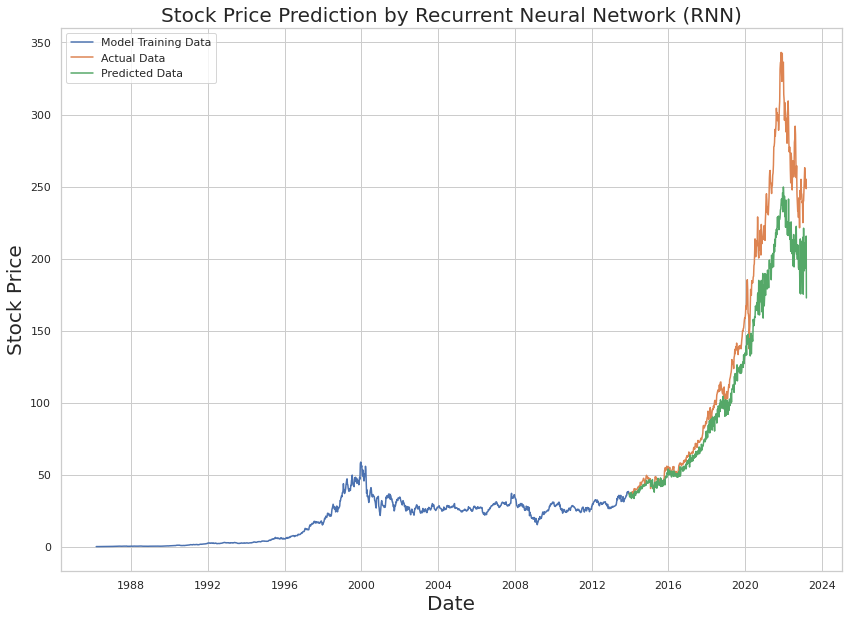

In [219]:
rnn_prediction(df2)